In [1]:
import numpy as np
from PIL import Image
t_size = 512,512 #thumbnail size

## New data type

When we import an image file as an Image object and turn it into an array the entries of the array will be integers between 0 and 255 inclusive of type [np.uint8](https://numpy.org/doc/stable/user/basics.types.html). The key difference between uint8 and regular integers is that addition and multiplication are done modulo $256=2^8.$ See what I mean below

In [2]:
x = np.uint8(190)
y = np.uint8(100)
x + y

C:\Users\wrthj\AppData\Local\Temp\ipykernel_22500\1789700487.py:3: RuntimeWarning: overflow encountered in scalar add
  x + y


np.uint8(34)

It provided that annoying RuntimeWarning but still worked: $190 + 100 \equiv 34 \text{ mod } 256.$

There are easy workarounds to that RuntimeWarning but we actually won't need them--when dealing with arrays numpy takes care of it.  

In [3]:
X = np.array([[100, 199],[200,12]]).astype(np.uint8) #The astype command casts the type as uint8
Y = np.array([[50, 57],[180,112]]).astype(np.uint8)

In [4]:
X + Y

array([[150,   0],
       [124, 124]], dtype=uint8)

Multiplying X or Y by a float value changes the dtype to float
and might put the values out of the range [0,255].

In [5]:
Z = -2.1*X + 10*Y + 200
Z

array([[ 234. , -159.9],
       [-212. ,  270.8]])

In [6]:
Z.dtype

dtype('float64')

Get used to the following command combo; do you see what it does?

In [7]:
Z = np.clip(Z,0,255).astype(np.uint8)
Z

array([[234,   0],
       [  0, 255]], dtype=uint8)

## The Image module/object from Python Image Library (PIL)

Import an image file as an [Image](https://pillow.readthedocs.io/en/stable/reference/Image.html) object

In [8]:
orig_im = Image.open('baseball.jpeg')
im = orig_im.copy() #Good practice to make a copy to manipulate

In [9]:
type(im)

PIL.Image.Image

Usually the size is too big to easily view.....

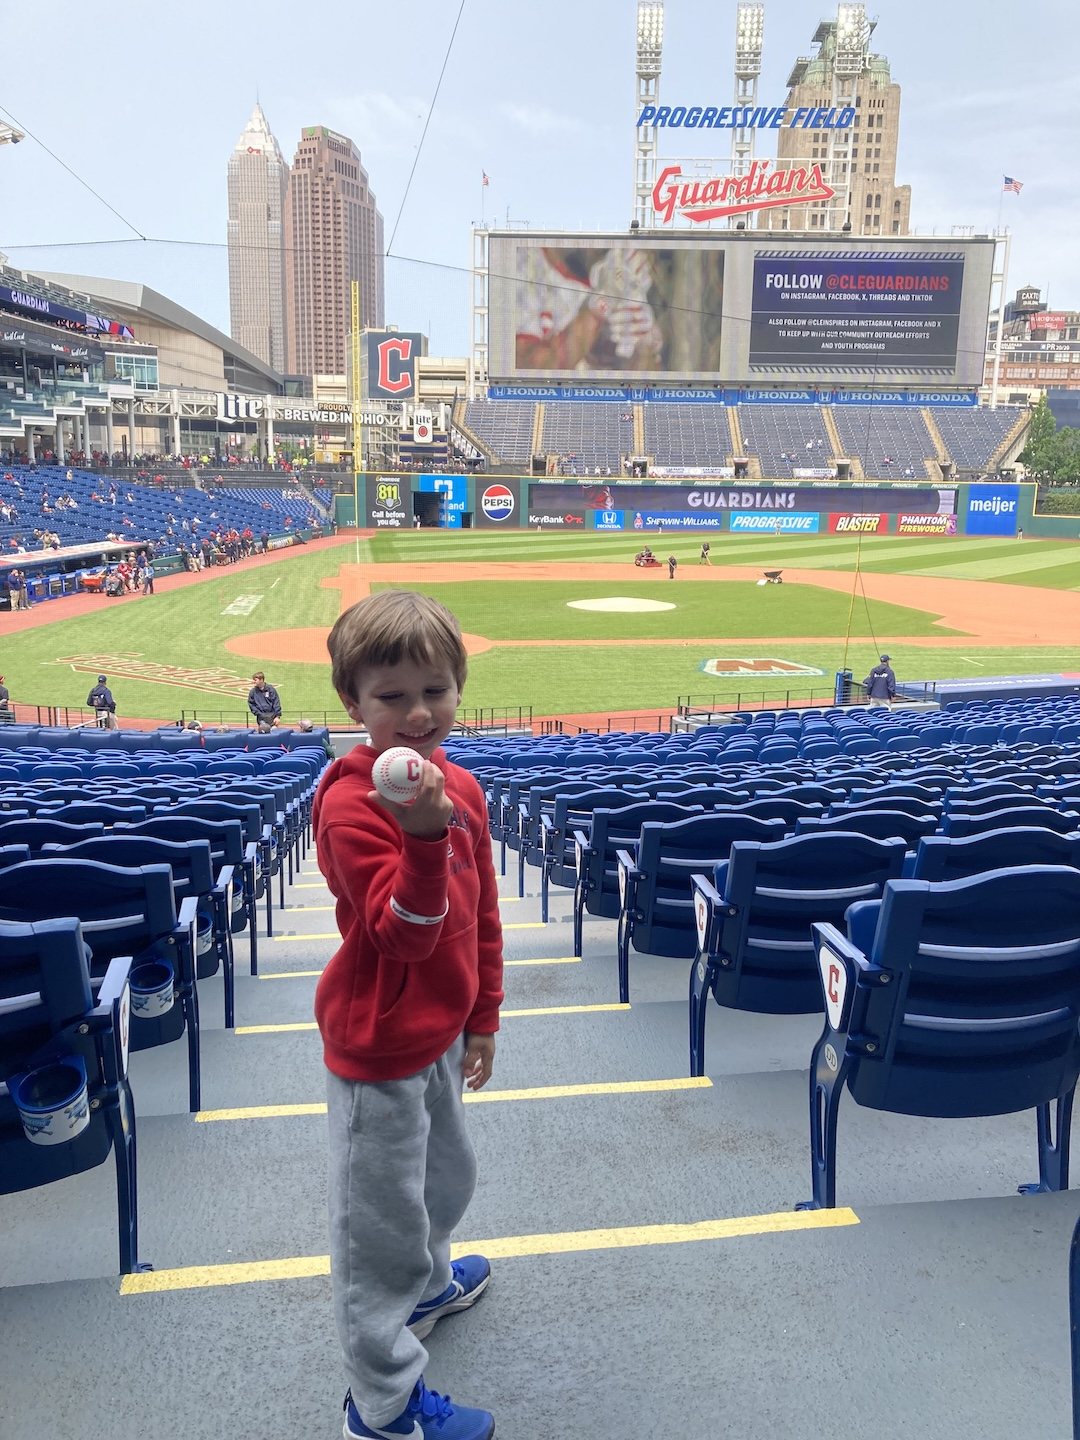

In [10]:
im

Reshape the image to view it easily:

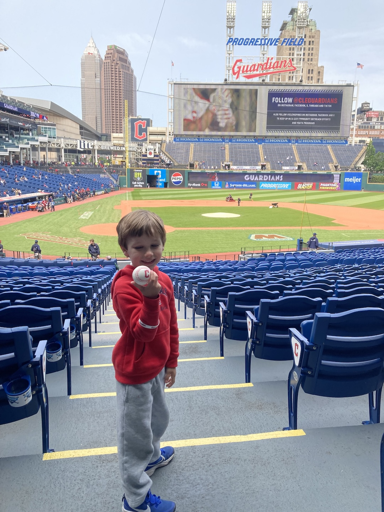

In [11]:
im.thumbnail(t_size) #I set the thumbnail size in the first cell
im

In [12]:
im_array = np.array(im) #turn the Image object into an array
im_array.shape

(512, 384, 3)

im_array is a 3D array.  It is 3 separate 512x384 matrices that correspond to the red, green and blue channels of the image. \
Each pixel values is a uint8 between 0 and 255.  0 is the darktest and 255 is the lightest. This is how the different channels are distributed:

In [14]:
red_im_array = im_array[:,:,0]
green_im_array = im_array[:,:,1]
blue_im_array = im_array[:,:,2]

I want to change all green values to 0 and then see what happens

In [15]:
im_array[:,:,1] = 0*im_array[:,:,1]

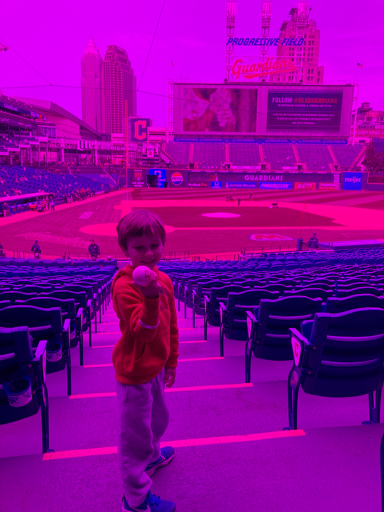

In [17]:
new_im = Image.fromarray(im_array) #Turns an array into an Image object
new_im

Play around by changing different color values.  In particular, get used to: Image object -> array -> back to Imabge object.

In [18]:
#No, actually do it

## Change the Brightness of an Image--2 ways

In [20]:
def bright1(im, pval):
    """Adds p_val to all channels and all pixels of an Image

    Parameters
    ----------
    im : PIL Image
    p_val : number

    Returns
    -------
    PIL Image
    """
    im_array = np.array(im)
    im_array = im_array + float(pval)
    im_array = np.clip(im_array,0,255).astype(np.uint8)
    
    return Image.fromarray(im_array)

Try it out with positive and negative values of pval.  Compare to the original
1. Do you expect positive values of pval to brighten or darken?

In [21]:
#Actually try it

2. Why did I put float(pval) in my code instead of just pval?
3. Change float(pval) to pval in bright1 and run bright1(im,10). Explain why it looks this way.

Make a function bright2(im, p_val) but instead of adding pval to every pixel it multiplies each pixel by pval. 

In [22]:
def bright2(im, pval):
    pass

## Adjust color and contrast of an Image

The grayscale version of an Image is used to adjust the color and contrast.  PIL of course has these functions built in--that's not the point, the point is for you to get comfortable manipulating images and understand *how* it works.  Don't waste the opportunity.

### Grayscale

In [23]:
gray_im = im.convert('L').convert('RGB')
#im.convert('L') changes im to a 2D gray image. Then .convert('RGB') changes it back to a 3D array
#but it looks the same (Why would we change it back to a 3D array??)

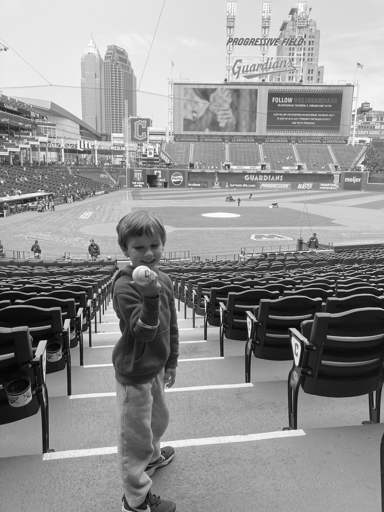

In [24]:
gray_im

In [25]:
def color(im, s):
    """Linearly blends each channel of the original image with 
       its grayscale version s*im+(1-s)*gray
    
    Parameters
    ----------
    im : PIL Image
    s  : number or (3,) number array
    
    Returns
    -------
    PIL Image
    
    """
    gray_im = im.convert('L').convert('RGB')
    im_array = np.array(im)
    gray_im_array = np.array(gray_im)
    s = np.asarray(s,dtype=float) #why?

    new_array = s*im_array + (1-s)*gray_im_array
    new_array = np.clip(new_array,0,255).astype(np.uint8)

    return Image.fromarray(new_array)

4. What do you think s=0 returns?
5. What about s=1? 
6. When s is size (3,) what do you think is happening when new_array is defined?
7. Try it when s is negative or bigger than 1 and when s is not a scalar.
8. Again, why am I writing s = np.asarray(s,dtype=float) instead of leaving s alone?

Now do something *very* similar.

In [ ]:
def contrast(im, s):
    """Linearly blends each channel of the original image with 
       the mean of its grayscale version s*im+(1-s)*gray
    
    Parameters
    ----------
    im : PIL Image
    s  : float or (3,) float array
    
    Returns
    -------
    PIL Image
    
    """

It's worth it to see what contrast is doing at a pixel level. Suppose m is the mean of all pixel values.  Then contrast does this to each pixel value x, $x\mapsto sx+(1-s)m.$  We plot contrast against the identity function for 2 key values of s.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
t = np.linspace(0,2.55,num=100) #scaling down
m = 1.0 #made up mean
s = 1.5 #Something >1
plt.plot(np.array([t,t]).T,np.array([t,s*t+(1-s)*m]).T);

What is going on here?

9.  If a pixel value x is to the right of the intersection is x or contrast(x,s) closer to the mean?
10. If a pixel value x is to the left of the intersection is x or contrast(x,s) closer to the mean?

In [ ]:
t = np.linspace(0,2.55,num=100) #scaling down
m = 1.0 #made up mean
s = 0.5 #Something <1
plt.plot(np.array([t,t]).T,np.array([t,s*t+(1-s)*m]).T);

What is going on here?

11. If a pixel value x is to the right of the intersection is x or contrast(x,s) closer to the mean?
12. If a pixel value x is to the left of the intersection is x or contrast(x,s) closer to the mean?

13. Based on your previous answers if $s>1$ are we increasing or decreasing the contrast?
14. Based on your previous answers if $s<1$ are we increasing or decreasing the contrast?

(We actually discussed this on the first day of class)